In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/gtzan-dataset-music-genre-classification/Data/features_3_sec.csv
/kaggle/input/gtzan-dataset-music-genre-classification/Data/features_30_sec.csv
/kaggle/input/gtzan-dataset-music-genre-classification/Data/images_original/disco/disco00005.png
/kaggle/input/gtzan-dataset-music-genre-classification/Data/images_original/disco/disco00057.png
/kaggle/input/gtzan-dataset-music-genre-classification/Data/images_original/disco/disco00020.png
/kaggle/input/gtzan-dataset-music-genre-classification/Data/images_original/disco/disco00072.png
/kaggle/input/gtzan-dataset-music-genre-classification/Data/images_original/disco/disco00040.png
/kaggle/input/gtzan-dataset-music-genre-classification/Data/images_original/disco/disco00043.png
/kaggle/input/gtzan-dataset-music-genre-classification/Data/images_original/disco/disco00010.png
/kaggle/input/gtzan-dataset-music-genre-classification/Data/images_original/disco/disco00071.png
/kaggle/input/gtzan-dataset-music-genre-classification/Data/image

In [2]:
import numpy as np
import librosa, librosa.display
import matplotlib.pyplot as plt

In [3]:
ex_file = "/kaggle/input/gtzan-dataset-music-genre-classification/Data/genres_original/pop/pop.00050.wav"

In [4]:
signal, sample_rate = librosa.load(ex_file)

In [5]:
import IPython.display as ipd
ipd.Audio(signal,rate=sample_rate)

In [6]:
print(signal,sample_rate )

[0.03704834 0.03735352 0.037323   ... 0.05224609 0.05944824 0.12362671] 22050


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Pass sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0.5, 1.0, 'WAVEFORM')

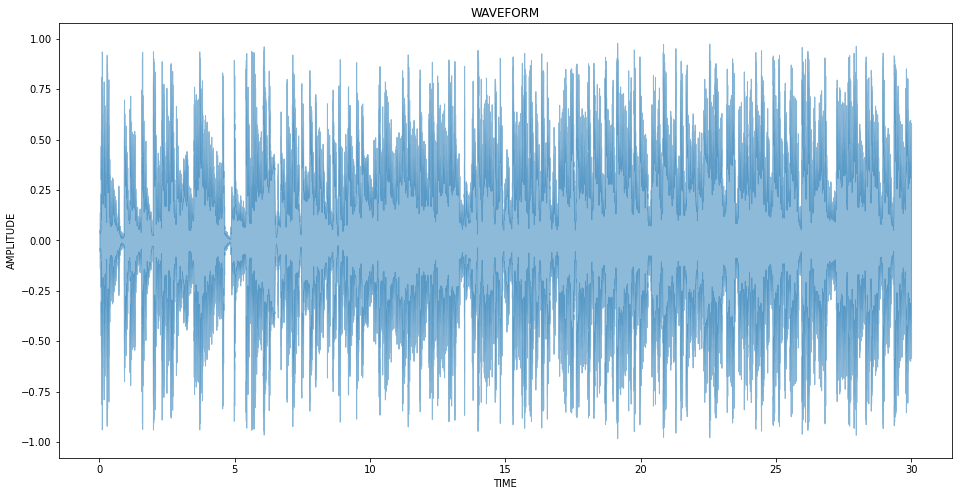

In [7]:
plt.figure(figsize = (16
                      ,8))
librosa.display.waveshow(signal,sample_rate,alpha = 0.5)
plt.xlabel("TIME")
plt.ylabel("AMPLITUDE")
plt.title("WAVEFORM")

In [8]:
## forier transformation -frequency domain
fft = np.fft.fft(signal)

In [9]:
## calculate the magnitude 
spectrum = np.abs(fft)
print(len(spectrum))

661504


In [10]:
## create the frequence variable
f = np.linspace(0,sample_rate,len(spectrum))

In [11]:
# print(len(f))
f.shape

(661504,)

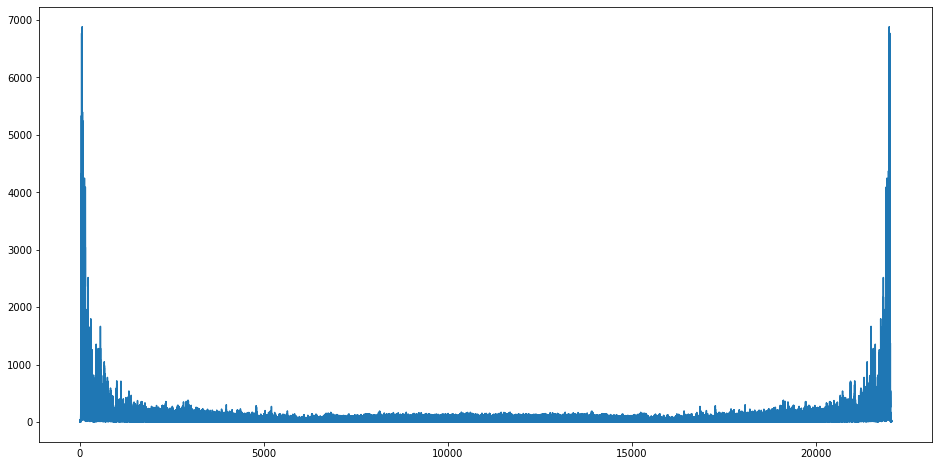

In [12]:
#plot spectrum
plt.figure(figsize = (16,8))
plt.plot(f,spectrum)
plt.show()

In [13]:
left_spectrum = spectrum[:int(len(spectrum)/2)]
left_f = f[:int(len(spectrum)/2)]

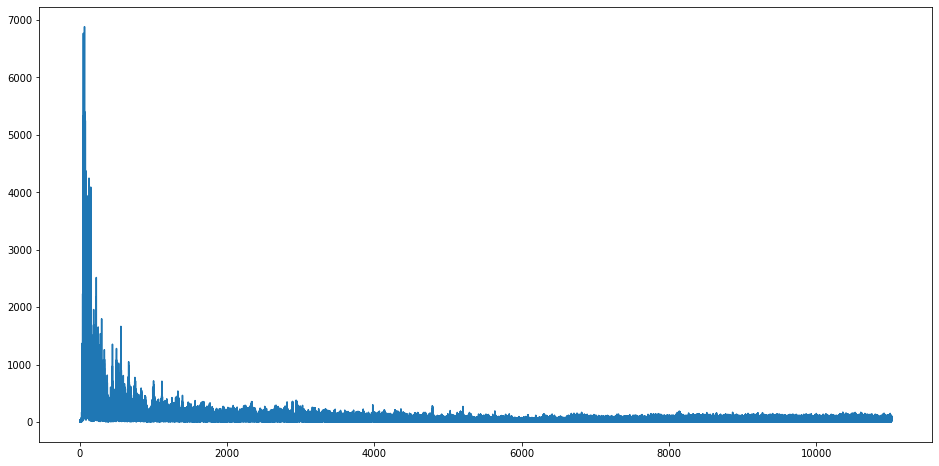

In [14]:
plt.figure(figsize = (16,8))
plt.plot(left_f,left_spectrum)

In [15]:
# Spectogram (STFT)
hop_length = 512
n_fft = 2048

In [16]:
stft = librosa.stft(signal,n_fft = n_fft, hop_length = hop_length)

In [17]:
spectogram = np.abs(stft)

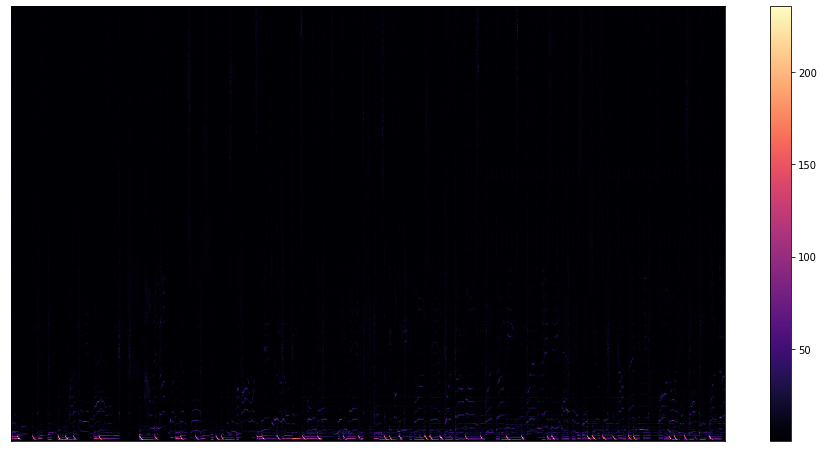

In [18]:
plt.figure(figsize = (16,8))
librosa.display.specshow(spectogram, sr = sample_rate, hop_length = hop_length)
plt.colorbar()

In [19]:
log_spectogram = librosa.amplitude_to_db(spectogram)

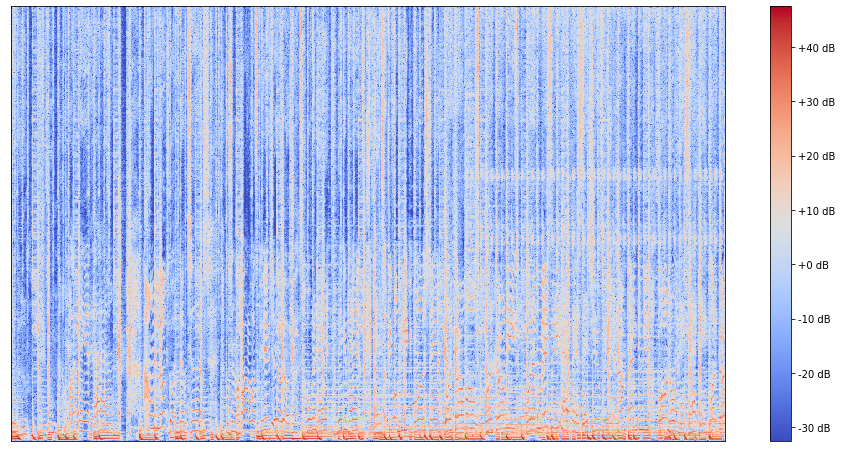

In [20]:
plt.figure(figsize = (16,8))
librosa.display.specshow(log_spectogram, sr = sample_rate, hop_length = hop_length)
plt.colorbar(format = "% +2.0f dB")

In [21]:
MFCC = librosa.feature.mfcc(signal,sample_rate,n_fft = n_fft,hop_length = hop_length,n_mfcc = 13 )

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Pass y=[0.03704834 0.03735352 0.037323   ... 0.05224609 0.05944824 0.12362671], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  """Entry point for launching an IPython kernel.


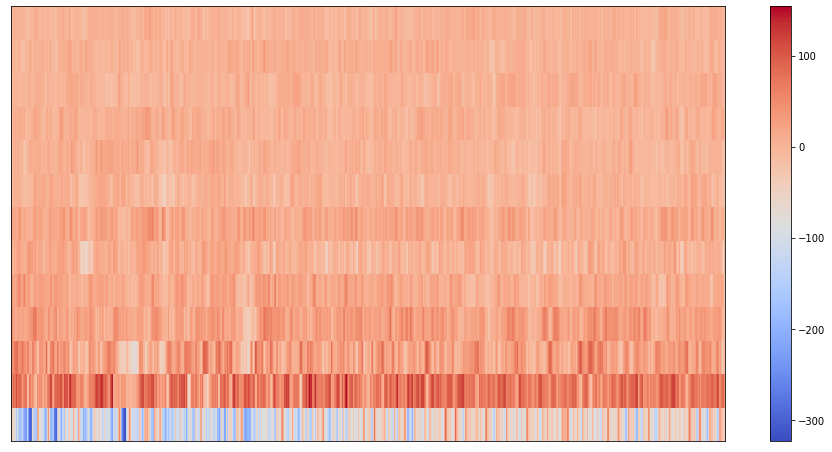

In [22]:
plt.figure(figsize = (16,8))
librosa.display.specshow(MFCC, sr = sample_rate, hop_length = hop_length)
plt.colorbar()

In [23]:
import json
import os
import math

In [24]:
dataset_path = r"../input/gtzan-dataset-music-genre-classification/Data/genres_original"
json_path = r"data.json"
SAMPLE_RATE = 22050
DURATION = 30
SAMPLES_PER_TRACK = SAMPLE_RATE * DURATION

In [25]:
def save_mfcc(dataset_path, json_path, n_mfcc=13, n_fft=2048,
             hop_length=512, num_segments=5):
    # Data storage dictionary
    data = {
        "mapping": [],
        "mfcc": [],
        "labels": [],
    }
    samples_ps = int(SAMPLES_PER_TRACK/num_segments) # ps = per segment
    expected_vects_ps = math.ceil(samples_ps/hop_length)
    
    # loop through all the genres
    for i, (dirpath, dirnames, filenames) in enumerate(os.walk(dataset_path)):
        # ensuring not at root
        if dirpath is not dataset_path:
            # save the semantic label
            dirpath_comp = dirpath.split("/")
            semantic_label = dirpath_comp[-1]
            data["mapping"].append(semantic_label)
            print(f"Processing: {semantic_label}")
            
            # process files for specific genre
            for f in filenames:
                if(f==str("jazz.00054.wav")):
                    # As librosa only read files <1Mb
                    continue
                else:
                    # load audio file
                    file_path = os.path.join(dirpath, f)
                    signal,sr = librosa.load(file_path,sr=SAMPLE_RATE)
                    for s in range(num_segments):
                        start_sample = samples_ps * s
                        finish_sample = start_sample + samples_ps

                        mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
                                                    sr = sr,
                                                    n_fft = n_fft,
                                                    n_mfcc = n_mfcc,
                                                    hop_length = hop_length)

                        mfcc = mfcc.T

                        # store mfcc if it has expected length 
                        if len(mfcc)==expected_vects_ps:
                            data["mfcc"].append(mfcc.tolist())
                            data["labels"].append(i-1)
                            print(f"{file_path}, segment: {s+1}")

    with open(json_path,"w") as f:
        json.dump(data,f,indent=4)

In [26]:
from IPython.display import clear_output

In [27]:
save_mfcc(dataset_path,json_path,num_segments=10)
clear_output()

In [28]:
def load_data(path):
    with open(path,'r') as f:
        data = json.load(f)
        
    x = np.array(data['mfcc'])
    y = np.array(data['labels'])
    return x,y

In [29]:
# load data
def prepare_dataset(test_size, validation_size):
    X,y = load_data(r"./data.json")
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size)
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = validation_size)
    X_train = X_train[..., np.newaxis]
    X_val = X_val[..., np.newaxis]
    X_test = X_test[..., np.newaxis]

    return X_train, X_val, X_test, y_train, y_val, y_test

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
X_train, X_val, X_test, y_train, y_val, y_test = prepare_dataset(0.25, 0.2)

In [32]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import *

In [33]:
input_shape = (X_train.shape[1],X_train.shape[2],X_train.shape[3])
print(input_shape)

(130, 13, 1)


In [34]:
model = Sequential()
model.add(Conv2D(64, (3, 3), activation = "relu", input_shape = input_shape))
model.add(MaxPool2D((3, 3), strides=(2, 2), padding="same"))
model.add(BatchNormalization())

model.add(Conv2D(32, (3, 3), activation = "relu"))
model.add(MaxPool2D((3, 3), strides=(2, 2), padding="same"))
model.add(BatchNormalization())

model.add(Conv2D(32, (2, 2), activation = "relu"))
model.add(MaxPool2D((2, 2), strides=(2, 2), padding="same"))
model.add(BatchNormalization())

model.add(Conv2D(16, (1, 1), activation = "relu"))
model.add(MaxPool2D((1, 1), strides=(2, 2), padding="same"))
model.add(BatchNormalization())

model.add(Flatten())
model.add(Dense(64, activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(10, activation="softmax"))

model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 11, 64)       640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 6, 64)         0         
_________________________________________________________________
batch_normalization (BatchNo (None, 64, 6, 64)         256       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 62, 4, 32)         18464     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 2, 32)         0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 31, 2, 32)         128       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 1, 32)         4

2022-06-28 11:24:21.603716: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [35]:
model.compile(optimizer="adam",
             loss="sparse_categorical_crossentropy",
             metrics=["accuracy"])

In [36]:
history = model.fit(X_train, y_train,
                 validation_data = (X_val, y_val),
                 epochs = 40,
                 batch_size = 32)

2022-06-28 11:24:22.457711: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/40
188/188 [==============================] - 8s 38ms/step - loss: 1.8566 - accuracy: 0.3485 - val_loss: 1.7044 - val_accuracy: 0.4045
Epoch 2/40
188/188 [==============================] - 6s 33ms/step - loss: 1.3671 - accuracy: 0.5086 - val_loss: 1.2704 - val_accuracy: 0.5347
Epoch 3/40
188/188 [==============================] - 6s 32ms/step - loss: 1.2498 - accuracy: 0.5490 - val_loss: 1.1604 - val_accuracy: 0.5794
Epoch 4/40
188/188 [==============================] - 6s 32ms/step - loss: 1.1317 - accuracy: 0.6017 - val_loss: 1.0218 - val_accuracy: 0.6495
Epoch 5/40
188/188 [==============================] - 6s 33ms/step - loss: 1.0227 - accuracy: 0.6371 - val_loss: 1.3173 - val_accuracy: 0.5714
Epoch 6/40
188/188 [==============================] - 7s 37ms/step - loss: 0.9932 - accuracy: 0.6483 - val_loss: 1.1580 - val_accuracy: 0.5841
Epoch 7/40
188/188 [==============================] - 6s 32ms/step - loss: 0.9272 - accuracy: 0.6782 - val_loss: 1.1049 - val_accuracy: 0.6095

In [37]:
def plot_history(hist):
    plt.figure(figsize=(20,15))
    fig, axs = plt.subplots(2)
    # accuracy subplot
    axs[0].plot(hist.history["accuracy"], label="train accuracy")
    axs[0].plot(hist.history["val_accuracy"], label="test accuracy")    
    axs[0].set_ylabel("Accuracy")
    axs[0].legend(loc="lower right")
    axs[0].set_title("Accuracy eval")
    
    # Error subplot
    axs[1].plot(hist.history["loss"], label="train error")
    axs[1].plot(hist.history["val_loss"], label="test error")    
    axs[1].set_ylabel("Error")
    axs[1].set_xlabel("Epoch")
    axs[1].legend(loc="upper right")
    axs[1].set_title("Error eval")
    
    plt.show()

<Figure size 1440x1080 with 0 Axes>

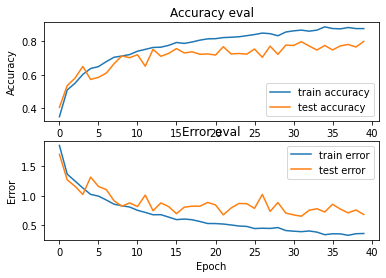

In [38]:
plot_history(history)

In [39]:
test_error, test_accuracy = model.evaluate(X_test, y_test, verbose=1)
print(f"Test accuracy: {test_accuracy}")

79/79 [==============================] - 1s 11ms/step - loss: 0.7434 - accuracy: 0.7821
Test accuracy: 0.7821385860443115


In [40]:
def predict(model, X, y):
    X = X[np.newaxis,...]
    prediction = model.predict(X)
    predicted_index = np.argmax(prediction, axis=1)
    print(f"Expected index: {y}, Predicted index: {predicted_index}")
predict(model, X_test[5], y_test[5])

Expected index: 1, Predicted index: [1]


In [41]:
X_test[5]

array([[[-34.61354828],
        [102.81871796],
        [-32.95504761],
        ...,
        [ -3.22578239],
        [-12.68904114],
        [-14.59077454]],

       [[-12.48129559],
        [109.44759369],
        [-33.60588837],
        ...,
        [ -6.60980749],
        [ -5.95232821],
        [-16.59227371]],

       [[-18.65143204],
        [121.07113647],
        [-39.28371048],
        ...,
        [-18.16569138],
        [ -1.12706339],
        [-16.93225861]],

       ...,

       [[-37.51393509],
        [102.64686584],
        [-33.65260315],
        ...,
        [ -9.57543182],
        [ 11.84724998],
        [-14.9972887 ]],

       [[-38.31467438],
        [ 96.33981323],
        [-31.93535995],
        ...,
        [ -9.865942  ],
        [ 13.17145157],
        [-15.99927139]],

       [[-57.75962448],
        [ 87.82361603],
        [-27.11094093],
        ...,
        [ -5.32494736],
        [ 15.78460979],
        [-10.340168  ]]])